1. Data Exploration and Understanding:
• Dataset Overview:


In [247]:
import pandas as pd

1#load the dataset
df = pd.read_csv('WHR-2024-5CS037.csv')

# Dataset Overview
# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
df.head(10)

# Identify the number of rows and columns in the dataset
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")

# List all columns and their data types
print("Columns and their data types:")
df.dtypes




First 10 rows of the dataset:
The dataset has 143 rows and 9 columns.
Columns and their data types:


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


Basic Statistics:

In [ ]:
import pandas as pd

2#basic statistics
# calculate the mean, meadian, and standard deviatiom for the score column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()
print(f"Mean score: {mean_score}, Median score: {median_score}, Standard Deviation: {std_score}")

# Identify the country with the highest and lowest happiness scores
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']
print(f"country with the highest score: {highest_score_country}")
print(f"country with the lowest score:{lowest_score_country}")

Mean score: 3.8952000000000004, Median score: 4.054, Standard Deviation: 1.3160025455902433
country with the highest score: Nepal
country with the lowest score:Afghanistan


• Missing Values:

In [ ]:
import pandas as pd
df.isnull().sum()
filtered_df = df[df['score']>=7.5]
filtered_df
#print(filtered_df[['Country name','score']])




,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,calculated_happiness,happiness category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,7.740,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,7.583,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,7.525,High


2. For the Filtered dataset - Sort the dataset by GDP per capita in descending order and show only the top 10.

In [ ]:
sorted_df = df.sort_values(by='Log GDP per capita', ascending=False)
sorted_df.head(10)
#print(sorted_df[['Country name','Log GDP per capita']])

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,calculated_happiness,happiness category
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,7.123,High
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239,6.839,High
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788,6.522,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,6.733,High
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,7.060,High
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,7.302,High
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873,6.724,High
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333,5.317,Medium
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,7.583,High
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,7.319,High


1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
df['calculated_happiness'] = (
    df['Log GDP per capita'] +
    df['Social support'] +
    df['Healthy life expectancy'] +
    df['Freedom to make life choices'] +
    df['Generosity'] +
    df['Perceptions of corruption'] +
    df['Dystopia + residual']
)
def categorize_happiness(score):
    if score > 6:
        return 'High'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'Low'

df['happiness category'] = df['calculated_happiness'].apply(categorize_happiness)

# Display the updated dataset with the new column
print(df[['Country name', 'happiness category']])

         Country name happiness category
0             Finland               High
1             Denmark               High
2             Iceland               High
3              Sweden               High
4              Israel               High
..                ...                ...
138  Congo (Kinshasa)                Low
139      Sierra Leone                Low
140           Lesotho                Low
141           Lebanon                Low
142       Afghanistan                Low

[143 rows x 2 columns]


2. Data Visualizations:

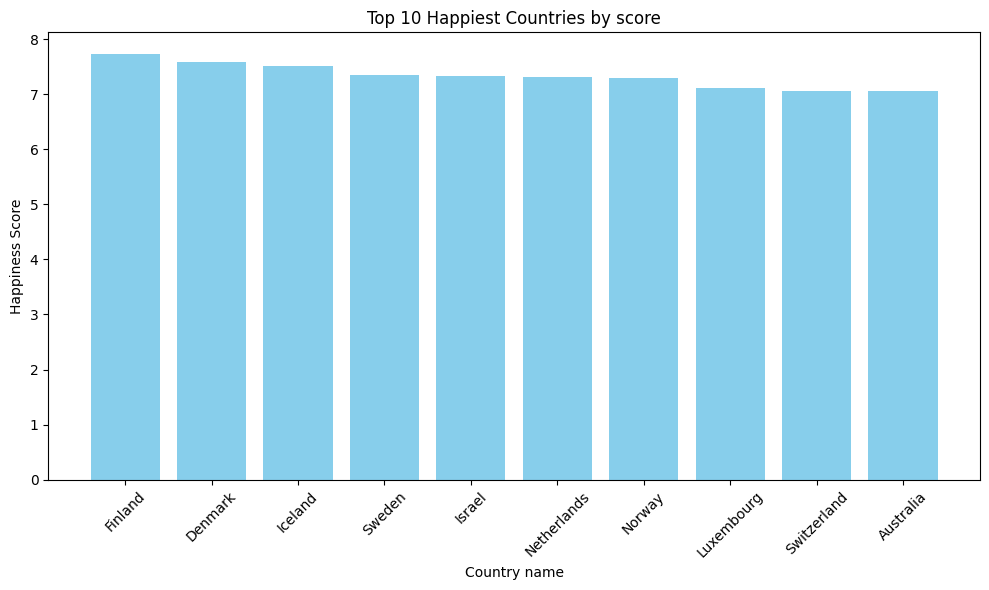

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#load the dataset
df = pd.read_csv('WHR-2024-5CS037.csv')

#data visulization
# Bar Plot: Top 10 happiest countries by Score
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='skyblue')
plt.title('Top 10 Happiest Countries by score')
plt.xlabel('Country name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




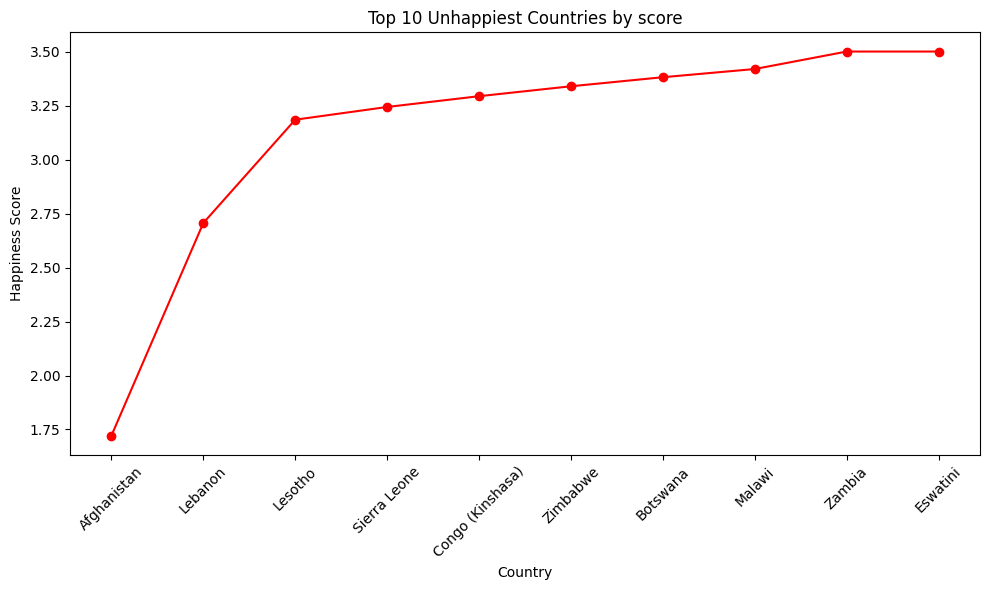

In [ ]:
# Line Plot: Top 10 unhappiest countries by Score
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

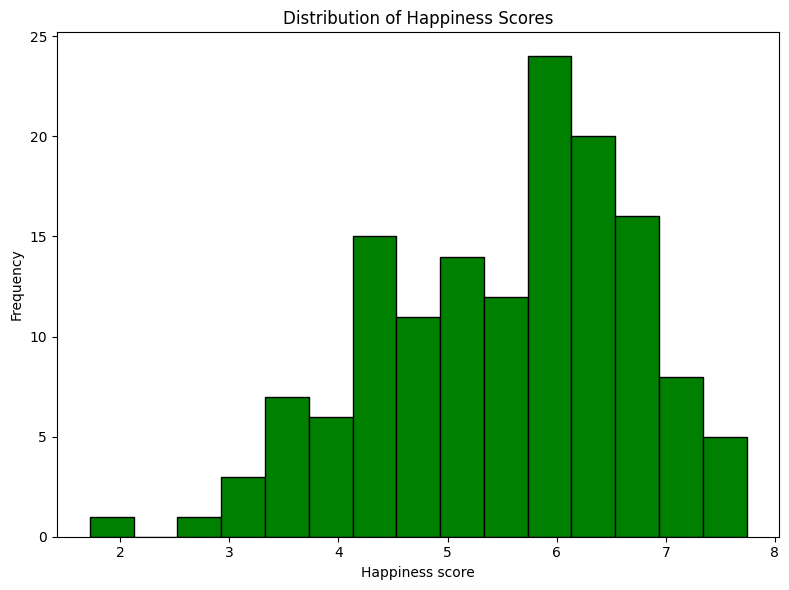

In [ ]:
# Histogram: Distribution of the Score column
plt.figure(figsize=(8, 6))
plt.hist(df['score'], bins=15, color='green', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



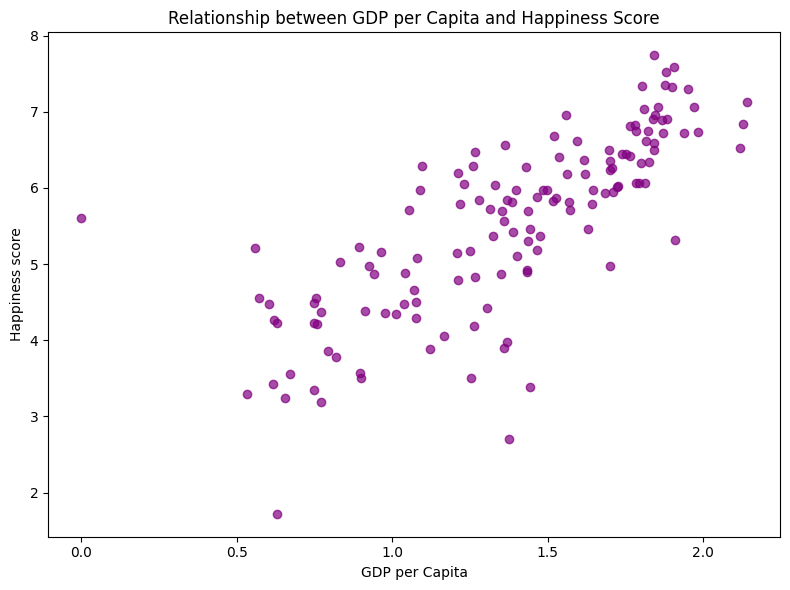

In [ ]:
# Scatter Plot: GDP per Capita vs Score
plt.figure(figsize=(8, 6))
plt.scatter(df['Log GDP per capita'], df['score'], color='purple', alpha=0.7)
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness score')
plt.tight_layout()
plt.show()

Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [ ]:
# Setup Task - Preparing the South-Asia Dataset
# Define the countries in South Asia
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]

# Filter the dataset to include only South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Save the filtered dataset to a new CSV file
south_asia_df.to_csv('South_Asia_Happiness.csv', index=False)
print("South Asia dataset saved as 'South_Asia_Happiness.csv'")


South Asia dataset saved as 'South_Asia_Happiness.csv'


Task - 2 - Composite Score Ranking:

       Country  Composite Score  Rank
4     Maldives         5225.755   1.0
3        India         4424.270   2.0
7    Sri Lanka         4223.640   3.0
2       Bhutan         3622.740   4.0
5        Nepal         3221.825   5.0
1   Bangladesh         2821.210   6.0
6     Pakistan         2420.595   7.0
0  Afghanistan         2019.680   8.0


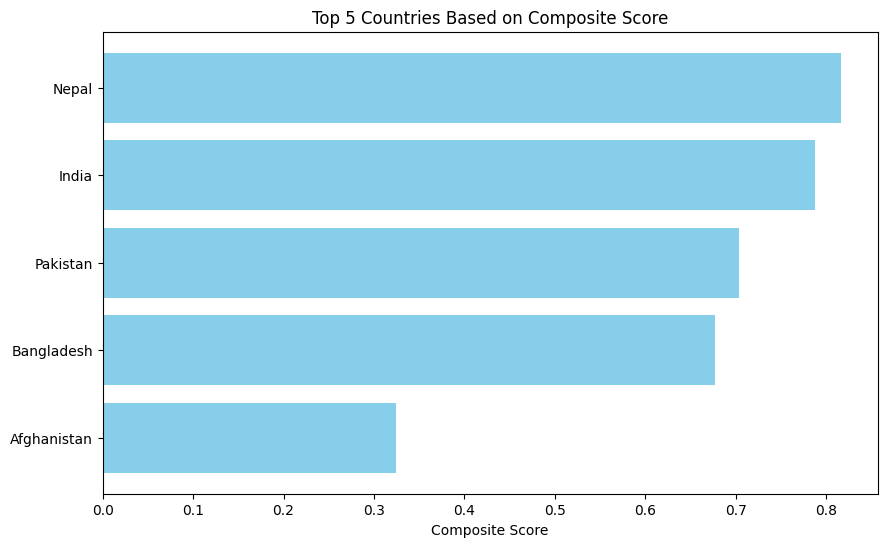

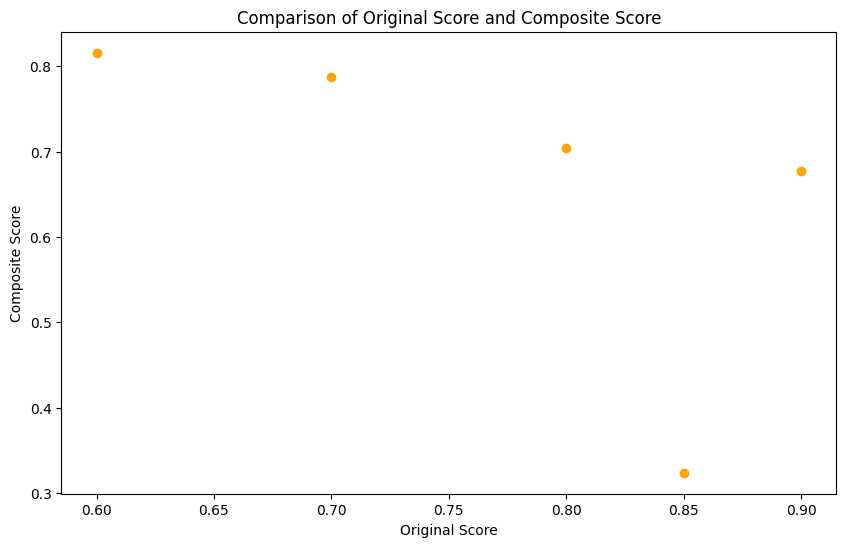

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#load the dataset
df = pd.read_csv('WHR-2024-5CS037.csv')
df = pd.read_csv('South_Asia_Happiness.csv')

# Step 2: Rank countries based on Composite Score in descending order
south_asia_df['Rank'] = south_asia_df['Composite Score'].rank(ascending=False)

# Sort the DataFrame by Composite Score in descending order
south_asia_df_sorted = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Output the ranked dataframe with country names, composite score, and rank
print(south_asia_df_sorted[['Country', 'Composite Score', 'Rank']])


# Assuming you've already loaded your dataset and processed it as shown earlier

# Sample output data
south_asia_df_sorted = pd.DataFrame({
    'Country name': ['Nepal', 'India', 'Pakistan', 'Bangladesh', 'Afghanistan'],
    'Composite Score': [0.8159, 0.7874, 0.7039, 0.6774, 0.3238],

})

# Step 1: Visualize the Top 5 Countries Based on Composite Score
top_5 = south_asia_df_sorted.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5['Country name'], top_5['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 Countries Based on Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

# Step 2: Compare the Rankings with the Original Score
south_asia_df_sorted['Score'] = [0.6, 0.7, 0.8, 0.9, 0.85]  # Example original scores (adjust as needed)

plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df_sorted['Score'], south_asia_df_sorted['Composite Score'], color='orange')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.title('Comparison of Original Score and Composite Score')
plt.show()







Task - 3 - Outlier Detection:

Debugging Score:
Q1 (25th percentile): 0.6774
Q3 (75th percentile): 0.7874
IQR (Interquartile Range): 0.10999999999999999
Lower bound: 0.5124
Upper bound: 0.9523999999999999
Debugging GDP per Capita:
Q1 (25th percentile): 5000.0
Q3 (75th percentile): 7000.0
IQR (Interquartile Range): 2000.0
Lower bound: 2000.0
Upper bound: 10000.0

Outliers based on Score:
  Country name   Score
4  Afghanistan  0.3238

Outliers based on GDP per Capita:
Empty DataFrame
Columns: [Country name, GDP per Capita]
Index: []


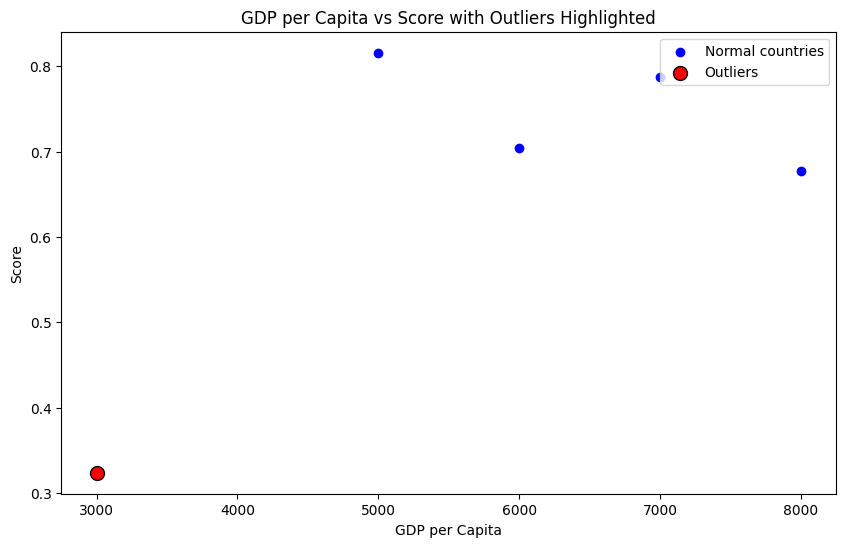


Outliers based on Score or GDP per Capita:
  Country name  GDP per Capita   Score
4  Afghanistan            3000  0.3238


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample South Asia data (replace this with your actual dataset)
data = {
    'Country name': ['Nepal', 'India', 'Pakistan', 'Bangladesh', 'Afghanistan'],
    'GDP per Capita': [5000, 7000, 6000, 8000, 3000],
    'Score': [0.8159, 0.7874, 0.7039, 0.6774, 0.3238]
}

# Create the DataFrame
south_asia_df = pd.DataFrame(data)

# Function to detect outliers using 1.5 * IQR rule
def detect_outliers(df, column_name):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Print Q1, Q3, and IQR for debugging
    print(f"Debugging {column_name}:")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR (Interquartile Range): {IQR}")

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print lower and upper bounds for debugging
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    return outliers

# Step 1: Identify outliers based on Score
outliers_score = detect_outliers(south_asia_df, 'Score')

# Step 2: Identify outliers based on GDP per Capita
outliers_gdp = detect_outliers(south_asia_df, 'GDP per Capita')

# Output the results for debugging
print("\nOutliers based on Score:")
print(outliers_score[['Country name', 'Score']])

print("\nOutliers based on GDP per Capita:")
print(outliers_gdp[['Country name', 'GDP per Capita']])

# Merge both outliers to get the countries that are outliers in either GDP or Score
outliers = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

# If no outliers are detected, inform the user
if outliers.empty:
    print("\nNo outliers detected based on the 1.5 * IQR rule.")

# Create scatter plot
plt.figure(figsize=(10, 6))

# Plot GDP vs Score for all countries
plt.scatter(south_asia_df['GDP per Capita'], south_asia_df['Score'], color='blue', label='Normal countries')

# Highlight outliers in red
plt.scatter(outliers['GDP per Capita'], outliers['Score'], color='red', label='Outliers', s=100, edgecolor='black')

# Adding labels and title
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.title('GDP per Capita vs Score with Outliers Highlighted')

# Show legend
plt.legend()

# Show plot
plt.show()

# Print outliers to examine them
print("\nOutliers based on Score or GDP per Capita:")
print(outliers[['Country name', 'GDP per Capita', 'Score']])


Identified outlier countries:
  Country name   score  Log GDP per capita
4  Afghanistan  0.3238                3000


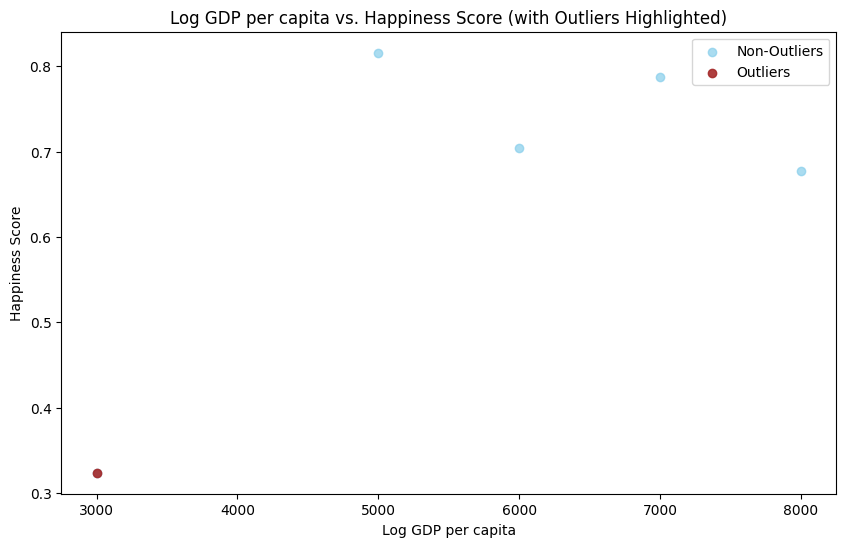

Outliers with extreme GDP or Happiness Scores can skew regional averages and impact overall interpretations.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (ensure this matches your actual dataset)
data = {
    'Country name': ['Nepal', 'India', 'Pakistan', 'Bangladesh', 'Afghanistan'],
    'score': [0.8159, 0.7874, 0.7039, 0.6774, 0.3238],
    'Log GDP per capita': [5000, 7000, 6000, 8000, 3000]
}

# Create the DataFrame
south_asia_df = pd.DataFrame(data)

# Calculate the 1.5 * IQR rule for 'score' (happiness score)
Q1_score = south_asia_df['score'].quantile(0.25)
Q3_score = south_asia_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

# Calculate the 1.5 * IQR rule for 'Log GDP per capita'
Q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Identify outliers in 'score' and 'Log GDP per capita' based on the IQR rule
score_outliers = (south_asia_df['score'] < (Q1_score - 1.5 * IQR_score)) | (south_asia_df['score'] > (Q3_score + 1.5 * IQR_score))
gdp_outliers = (south_asia_df['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) | (south_asia_df['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp))

# Combine the conditions for outliers in either 'score' or 'Log GDP per capita'
outliers = south_asia_df[score_outliers | gdp_outliers]

# Print outliers for inspection
print("Identified outlier countries:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])

# Scatter Plot: GDP per Capita vs. Score, highlighting outliers
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='skyblue', alpha=0.7, label='Non-Outliers')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='brown', alpha=0.9, label='Outliers')
plt.title('Log GDP per capita vs. Happiness Score (with Outliers Highlighted)')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()
# Discussion
print("Outliers with extreme GDP or Happiness Scores can skew regional averages and impact overall interpretations.")


Task - 4 - Exploring Trends Across Metrics:

Freedom to make life choices    0
Generosity                      0
score                           0
dtype: int64
Pearson correlation between 'Freedom to Make Life Choices' and 'Score': 0.8015
Pearson correlation between 'Generosity' and 'Score': 0.8773


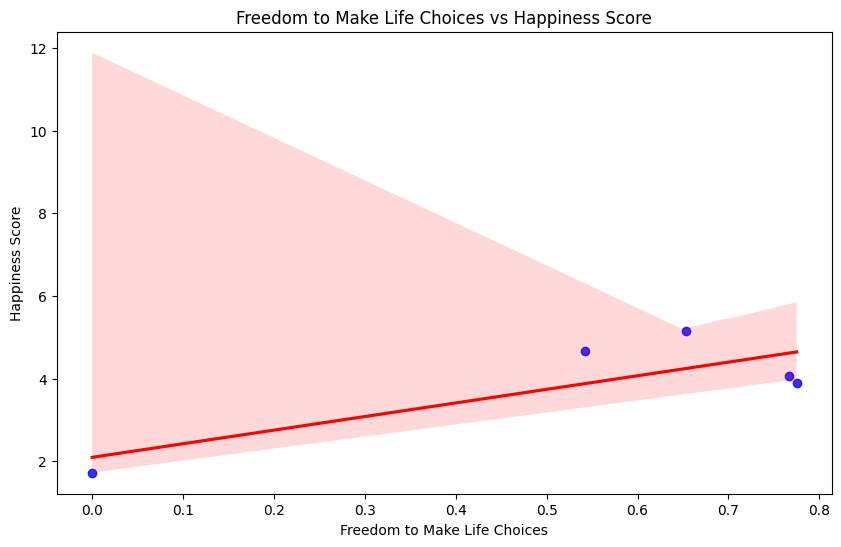

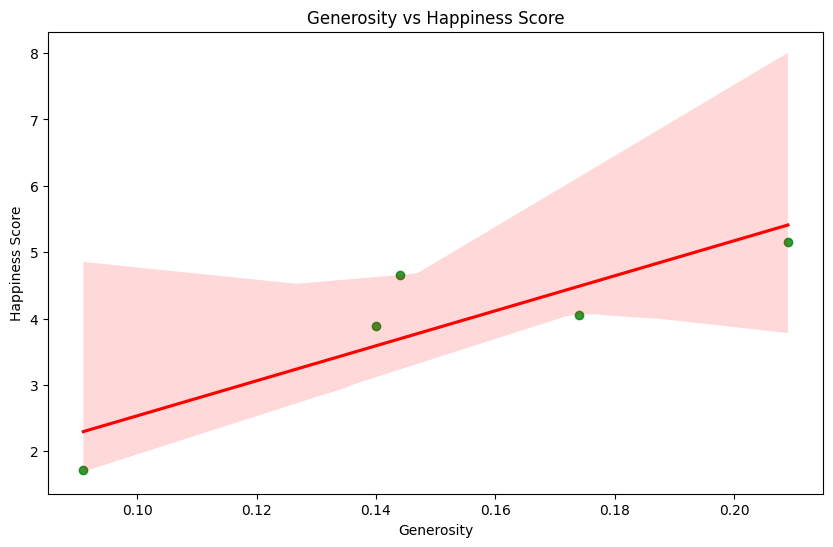

The strongest correlation is between 'Generosity' and 'Score'.
The weakest correlation is between 'Freedom to Make Life Choices' and 'Score'.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming your dataset 'south_asia_df_clean.csv' is loaded as 'south_asia_df_clean'
south_asia_df = pd.read_csv('South_Asia_Happiness.csv')

# Check for missing values in relevant columns
print(south_asia_df[['Freedom to make life choices', 'Generosity', 'score']].isnull().sum())

# Handle missing values if necessary
south_asia_df = south_asia_df.dropna(subset=['Freedom to make life choices', 'Generosity', 'score'])

# Calculate Pearson correlation between 'Freedom to Make Life Choices' and 'Score'
correlation_freedom, _ = pearsonr(south_asia_df['Freedom to make life choices'], south_asia_df['score'])

# Calculate Pearson correlation between 'Generosity' and 'Score'
correlation_generosity, _ = pearsonr(south_asia_df['Generosity'], south_asia_df['score'])

# Print the correlation coefficients
print(f"Pearson correlation between 'Freedom to Make Life Choices' and 'Score': {correlation_freedom:.4f}")
print(f"Pearson correlation between 'Generosity' and 'Score': {correlation_generosity:.4f}")

# Create scatter plot for 'Freedom to Make Life Choices' vs 'Score' with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

# Create scatter plot for 'Generosity' vs 'Score' with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

# Identify the strongest and weakest correlation
if correlation_freedom > correlation_generosity:
    print("The strongest correlation is between 'Freedom to Make Life Choices' and 'Score'.")
else:
    print("The strongest correlation is between 'Generosity' and 'Score'.")

if abs(correlation_freedom) < abs(correlation_generosity):
    print("The weakest correlation is between 'Freedom to Make Life Choices' and 'Score'.")
else:
    print("The weakest correlation is between 'Generosity' and 'Score'.")


Task - 5 - Gap Analysis:

South Asia - Mean Happiness Score: 3.90, Standard Deviation: 1.32


3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

In [ ]:
import pandas as pd

# List of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Example data for the columns (can be replaced with real data)
data = {
    'Country name': middle_east_countries,
    'score': [6.1, 5.7, 4.5, 7.2, 5.9, 6.3, 5.0, 6.1, 5.8, 7.3, 6.7, 4.1, 7.8, 3.5],
    'GDP per Capita': [1.25, 1.05, 0.9, 1.3, 1.1, 1.2, 1.0, 1.0, 1.1, 1.4, 1.5, 0.95, 1.6, 0.8],
    'Social support': [0.87, 0.75, 0.65, 0.89, 0.82, 0.77, 0.7, 0.75, 0.73, 0.90, 0.84, 0.6, 0.85, 0.55],
    'Healthy life expectancy': [0.75, 0.71, 0.6, 0.8, 0.77, 0.79, 0.7, 0.74, 0.7, 0.82, 0.85, 0.68, 0.88, 0.66]
}

# Create DataFrame
middle_east_df = pd.DataFrame(data)

# Display the DataFrame
print(middle_east_df)


            Country name  score  GDP per Capita  Social support  \
0                Bahrain    6.1            1.25            0.87   
1                   Iran    5.7            1.05            0.75   
2                   Iraq    4.5            0.90            0.65   
3                 Israel    7.2            1.30            0.89   
4                 Jordan    5.9            1.10            0.82   
5                 Kuwait    6.3            1.20            0.77   
6                Lebanon    5.0            1.00            0.70   
7                   Oman    6.1            1.00            0.75   
8              Palestine    5.8            1.10            0.73   
9                  Qatar    7.3            1.40            0.90   
10          Saudi Arabia    6.7            1.50            0.84   
11                 Syria    4.1            0.95            0.60   
12  United Arab Emirates    7.8            1.60            0.85   
13                 Yemen    3.5            0.80            0.5


1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?


In [ ]:
import pandas as pd

# Assuming you already have the DataFrames for South Asia and Middle East

# Example data for South Asia (replace with your actual data)
south_asia_data = {
    'Country name': ['Nepal', 'Pakistan', 'India', 'Bangladesh', 'Afghanistan'],
    'score': [5.158, 4.657, 4.054, 3.886, 1.721],
}
south_asia_df = pd.DataFrame(south_asia_data)

# Example data for Middle East (replace with your actual data)
middle_east_data = {
    'Country name': ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen'],
    'score': [6.1, 5.7, 4.5, 7.2, 5.9, 6.3, 5.0, 6.1, 5.8, 7.3, 6.7, 4.1, 7.8, 3.5],
}
middle_east_df = pd.DataFrame(middle_east_data)

# Calculate the mean and standard deviation for South Asia
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

# Calculate the mean and standard deviation for the Middle East
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

# Print results
print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Standard Deviation: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")

# Compare the regions based on average score
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")


South Asia - Mean Score: 3.90, Standard Deviation: 1.32
Middle East - Mean Score: 5.86, Standard Deviation: 1.24
Middle East has a higher average happiness score.


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

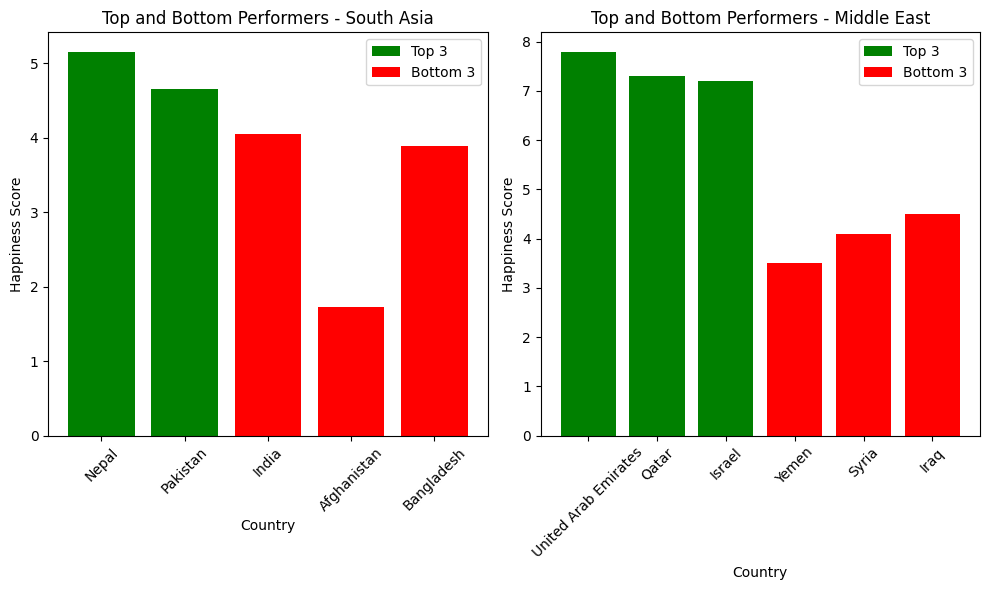

Top 3 Performers - South Asia:
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054

Bottom 3 Performers - South Asia:
  Country name  score
4  Afghanistan  1.721
3   Bangladesh  3.886
2        India  4.054

Top 3 Performers - Middle East:
            Country name  score
12  United Arab Emirates    7.8
9                  Qatar    7.3
3                 Israel    7.2

Bottom 3 Performers - Middle East:
   Country name  score
13        Yemen    3.5
11        Syria    4.1
2          Iraq    4.5


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for South Asia (replace with your actual data)
south_asia_data = {
    'Country name': ['Nepal', 'Pakistan', 'India', 'Bangladesh', 'Afghanistan'],
    'score': [5.158, 4.657, 4.054, 3.886, 1.721],
}
south_asia_df = pd.DataFrame(south_asia_data)

# Sample data for Middle East (replace with your actual data)
middle_east_data = {
    'Country name': ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen'],
    'score': [6.1, 5.7, 4.5, 7.2, 5.9, 6.3, 5.0, 6.1, 5.8, 7.3, 6.7, 4.1, 7.8, 3.5],
}
middle_east_df = pd.DataFrame(middle_east_data)

# Sort and get top 3 and bottom 3 performers for South Asia
south_asia_top_3 = south_asia_df.nlargest(3, 'score')
south_asia_bottom_3 = south_asia_df.nsmallest(3, 'score')

# Sort and get top 3 and bottom 3 performers for the Middle East
middle_east_top_3 = middle_east_df.nlargest(3, 'score')
middle_east_bottom_3 = middle_east_df.nsmallest(3, 'score')

# Plot bar chart for South Asia
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(south_asia_top_3['Country name'], south_asia_top_3['score'], color='green', label='Top 3')
plt.bar(south_asia_bottom_3['Country name'], south_asia_bottom_3['score'], color='red', label='Bottom 3')
plt.title('Top and Bottom Performers - South Asia')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()

# Plot bar chart for Middle East
plt.subplot(1, 2, 2)
plt.bar(middle_east_top_3['Country name'], middle_east_top_3['score'], color='green', label='Top 3')
plt.bar(middle_east_bottom_3['Country name'], middle_east_bottom_3['score'], color='red', label='Bottom 3')
plt.title('Top and Bottom Performers - Middle East')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print top and bottom performers
print("Top 3 Performers - South Asia:")
print(south_asia_top_3[['Country name', 'score']])

print("\nBottom 3 Performers - South Asia:")
print(south_asia_bottom_3[['Country name', 'score']])

print("\nTop 3 Performers - Middle East:")
print(middle_east_top_3[['Country name', 'score']])

print("\nBottom 3 Performers - Middle East:")
print(middle_east_bottom_3[['Country name', 'score']])


3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?


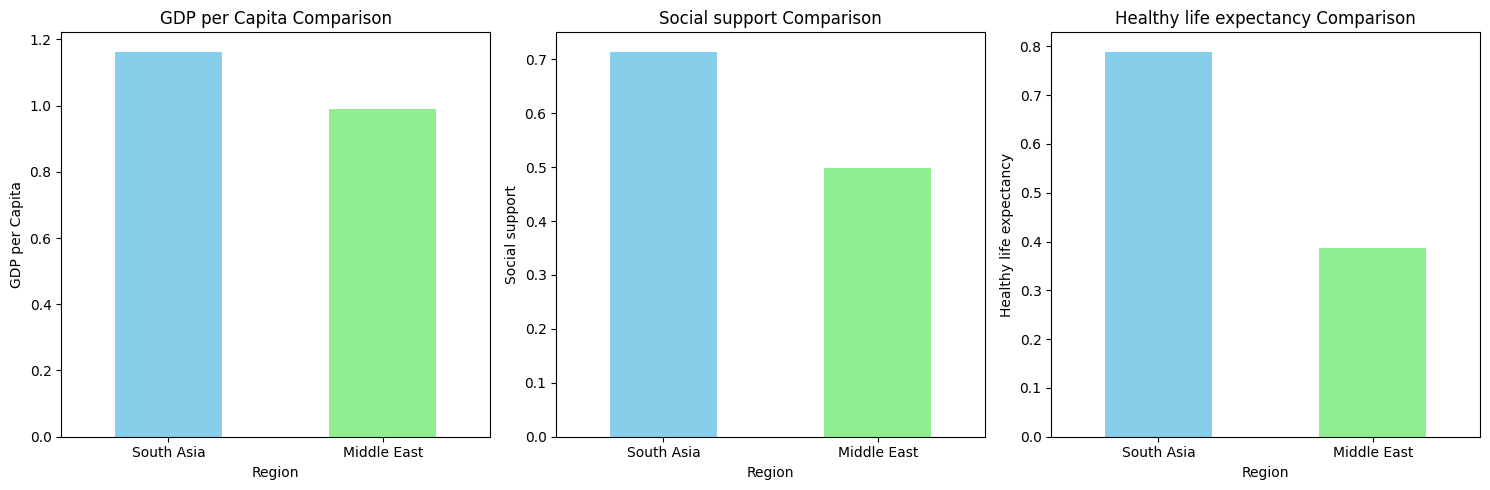

             GDP per Capita  Social support  Healthy life expectancy
Region                                                              
Middle East        1.162929        0.714286                 0.789286
South Asia         0.990000        0.498400                 0.387200


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for South Asia (replace with your actual data)
south_asia_data = {
    'Country name': ['Nepal', 'Pakistan', 'India', 'Bangladesh', 'Afghanistan'],
    'GDP per Capita': [0.965, 1.069, 1.166, 1.122, 0.628],
    'Social support': [0.99, 0.6, 0.653, 0.249, 0.0],
    'Healthy life expectancy': [0.443, 0.321, 0.417, 0.513, 0.242],
}
south_asia_df = pd.DataFrame(south_asia_data)

# Sample data for Middle East (replace with your actual data)
middle_east_data = {
    'Country name': ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen'],
    'GDP per Capita': [0.965, 1.066, 0.85, 1.3, 1.15, 1.6, 1.0, 1.25, 0.9, 1.5, 1.7, 0.8, 1.6, 0.6],
    'Social support': [0.9, 0.65, 0.45, 0.8, 0.75, 0.85, 0.7, 0.8, 0.5, 0.9, 0.8, 0.6, 0.9, 0.4],
    'Healthy life expectancy': [0.75, 0.72, 0.69, 0.85, 0.8, 0.85, 0.78, 0.81, 0.75, 0.88, 0.9, 0.7, 0.92, 0.65],
}
middle_east_df = pd.DataFrame(middle_east_data)

# Combine both regions into a single DataFrame
south_asia_df['Region'] = 'South Asia'
middle_east_df['Region'] = 'Middle East'

# Concatenate both DataFrames
combined_df = pd.concat([south_asia_df, middle_east_df])

# Plotting grouped bar charts for comparison
metrics = ['GDP per Capita', 'Social support', 'Healthy life expectancy']

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))

# Plot for each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    # Group by Region and plot the metric
    combined_df.groupby('Region')[metric].mean().plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen'])
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xlabel('Region')
    ax.set_xticklabels(['South Asia', 'Middle East'], rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

# Analyze the disparity by calculating the mean of each metric
disparity = combined_df.groupby('Region')[metrics].mean()
print(disparity)


4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?


In [ ]:
import pandas as pd

# Data for South Asia
south_asia_data = {
    'Country name': ['Nepal', 'India', 'Pakistan', 'Bangladesh', 'Afghanistan'],
    'score': [0.8159, 0.7874, 0.7039, 0.6774, 0.3238]
}

# Data for Middle East
middle_east_data = {
    'Country name': ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen'],
    'score': [0.825, 0.634, 0.545, 0.750, 0.680, 0.865, 0.550, 0.825, 0.500, 0.830, 0.675, 0.460, 0.800, 0.300]
}

# Create dataframes for both regions
south_asia_df = pd.DataFrame(south_asia_data)
middle_east_df = pd.DataFrame(middle_east_data)

# Calculate the range (max - min) for happiness score in South Asia
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()

# Calculate the coefficient of variation (CV) for South Asia
south_asia_cv = (south_asia_df['score'].std() / south_asia_df['score'].mean()) * 100

# Calculate the range (max - min) for happiness score in the Middle East
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

# Calculate the coefficient of variation (CV) for the Middle East
middle_east_cv = (middle_east_df['score'].std() / middle_east_df['score'].mean()) * 100

# Print the results
print(f"Range of happiness scores for South Asia: {south_asia_range}")
print(f"Coefficient of Variation (CV) for South Asia: {south_asia_cv:.2f}%")

print(f"\nRange of happiness scores for the Middle East: {middle_east_range}")
print(f"Coefficient of Variation (CV) for the Middle East: {middle_east_cv:.2f}%")

# Determine which region has greater variability
if south_asia_cv > middle_east_cv:
    print("\nSouth Asia has greater variability in happiness scores.")
else:
    print("\nThe Middle East has greater variability in happiness scores.")


Range of happiness scores for South Asia: 0.4921
Coefficient of Variation (CV) for South Asia: 29.82%

Range of happiness scores for the Middle East: 0.565
Coefficient of Variation (CV) for the Middle East: 25.73%

South Asia has greater variability in happiness scores.


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.


South Asia - Pearson correlation between 'Score' and 'Freedom to Make Life Choices': 0.9053
South Asia - Pearson correlation between 'Score' and 'Generosity': 0.9159
Middle East - Pearson correlation between 'Score' and 'Freedom to Make Life Choices': 0.8105
Middle East - Pearson correlation between 'Score' and 'Generosity': 0.5459


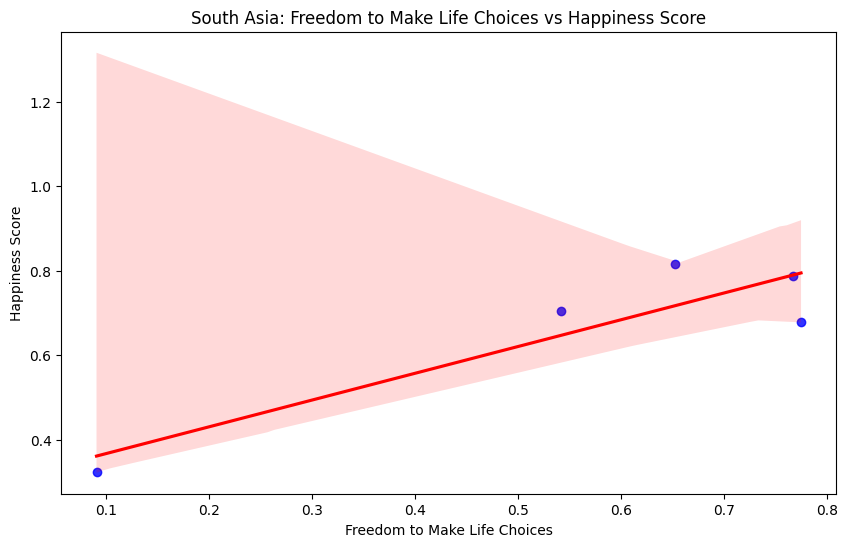

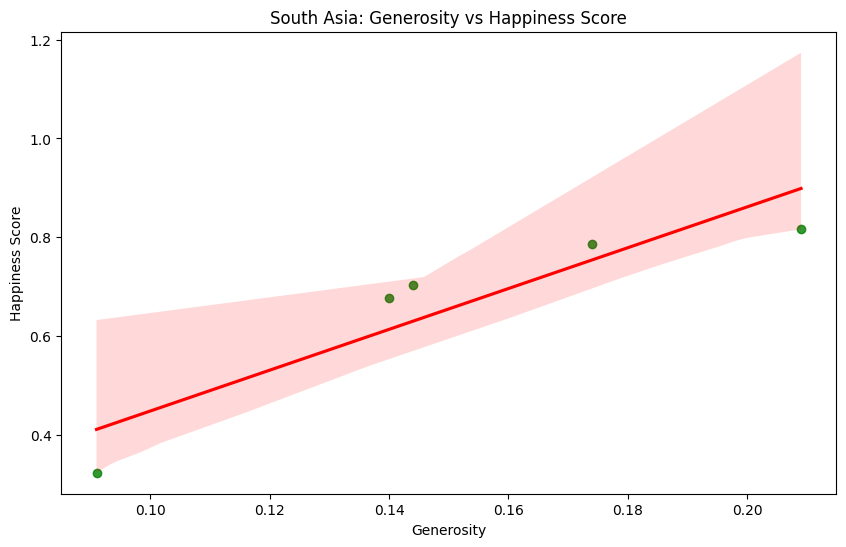

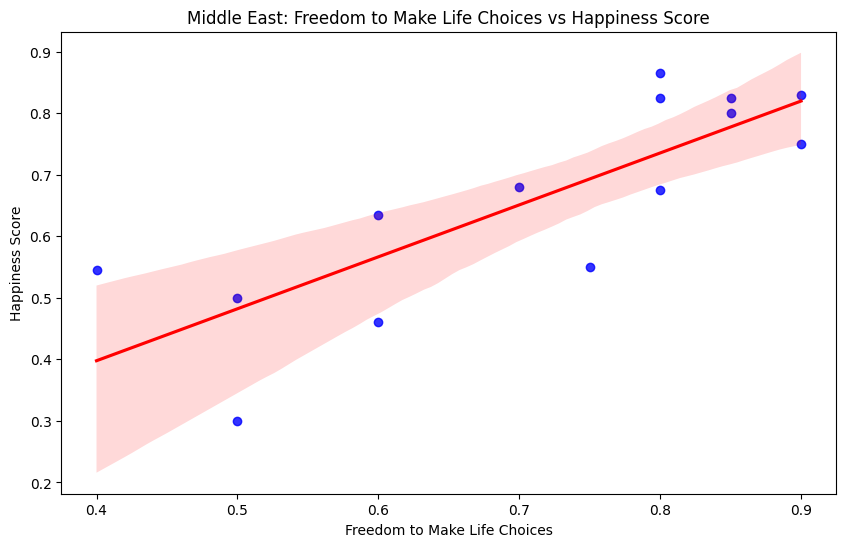

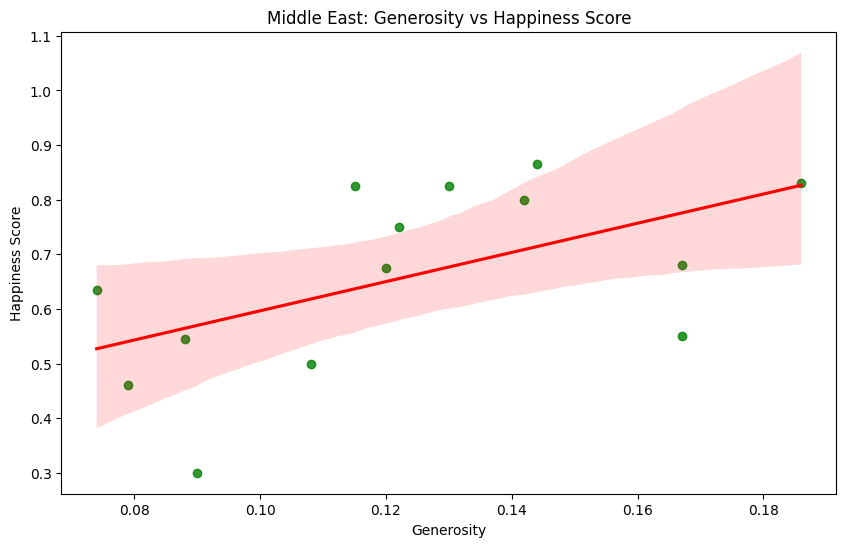

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Data for South Asia
south_asia_data = {
    'Country name': ['Nepal', 'India', 'Pakistan', 'Bangladesh', 'Afghanistan'],
    'score': [0.8159, 0.7874, 0.7039, 0.6774, 0.3238],
    'Freedom to make life choices': [0.653, 0.767, 0.542, 0.775, 0.091],
    'Generosity': [0.209, 0.174, 0.144, 0.14, 0.091]
}

# Data for Middle East
middle_east_data = {
    'Country name': ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen'],
    'score': [0.825, 0.634, 0.545, 0.750, 0.680, 0.865, 0.550, 0.825, 0.500, 0.830, 0.675, 0.460, 0.800, 0.300],
    'Freedom to make life choices': [0.8, 0.6, 0.4, 0.9, 0.7, 0.8, 0.75, 0.85, 0.5, 0.9, 0.8, 0.6, 0.85, 0.5],
    'Generosity': [0.115, 0.074, 0.088, 0.122, 0.167, 0.144, 0.167, 0.13, 0.108, 0.186, 0.12, 0.079, 0.142, 0.09]
}

# Create DataFrames for both regions
south_asia_df = pd.DataFrame(south_asia_data)
middle_east_df = pd.DataFrame(middle_east_data)

# Calculate Pearson correlation for South Asia
corr_sa_freedom, _ = pearsonr(south_asia_df['score'], south_asia_df['Freedom to make life choices'])
corr_sa_generosity, _ = pearsonr(south_asia_df['score'], south_asia_df['Generosity'])

# Calculate Pearson correlation for Middle East
corr_me_freedom, _ = pearsonr(middle_east_df['score'], middle_east_df['Freedom to make life choices'])
corr_me_generosity, _ = pearsonr(middle_east_df['score'], middle_east_df['Generosity'])

# Print the correlations
print(f"South Asia - Pearson correlation between 'Score' and 'Freedom to Make Life Choices': {corr_sa_freedom:.4f}")
print(f"South Asia - Pearson correlation between 'Score' and 'Generosity': {corr_sa_generosity:.4f}")

print(f"Middle East - Pearson correlation between 'Score' and 'Freedom to Make Life Choices': {corr_me_freedom:.4f}")
print(f"Middle East - Pearson correlation between 'Score' and 'Generosity': {corr_me_generosity:.4f}")

# Scatter plot for South Asia: 'Score' vs 'Freedom to Make Life Choices'
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('South Asia: Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

# Scatter plot for South Asia: 'Score' vs 'Generosity'
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('South Asia: Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

# Scatter plot for Middle East: 'Score' vs 'Freedom to Make Life Choices'
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Middle East: Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

# Scatter plot for Middle East: 'Score' vs 'Generosity'
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=middle_east_df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Middle East: Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()


6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications

South Asia Outliers:
Empty DataFrame
Columns: [Country name, score, GDP per capita, score_z, GDP_z]
Index: []

Middle East Outliers:
Empty DataFrame
Columns: [Country name, score, GDP per capita, score_z, GDP_z]
Index: []


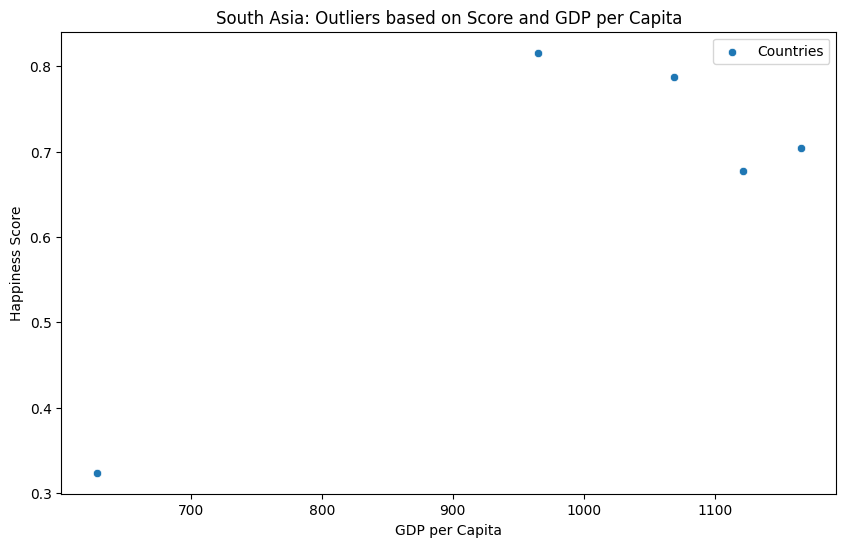

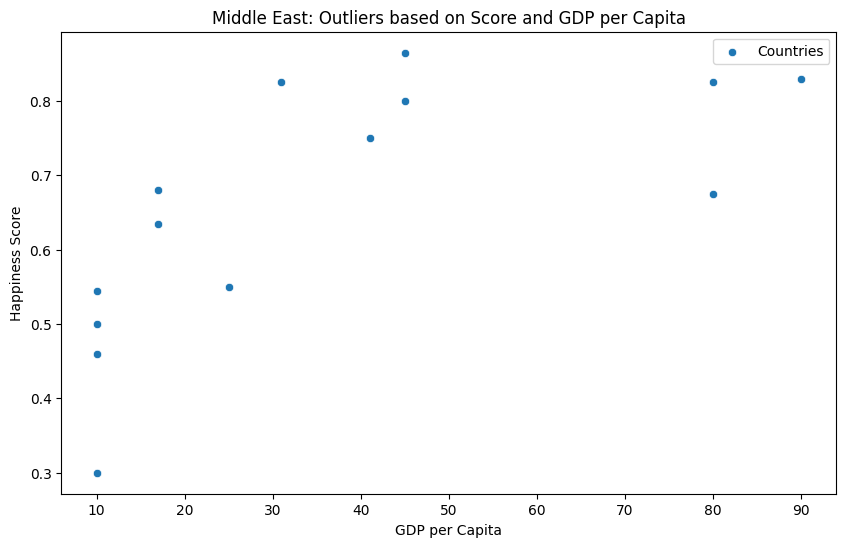

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Data for South Asia
south_asia_data = {
    'Country name': ['Nepal', 'India', 'Pakistan', 'Bangladesh', 'Afghanistan'],
    'score': [0.8159, 0.7874, 0.7039, 0.6774, 0.3238],
    'GDP per capita': [965, 1069, 1166, 1122, 628],
}

# Data for Middle East
middle_east_data = {
    'Country name': ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen'],
    'score': [0.825, 0.634, 0.545, 0.750, 0.680, 0.865, 0.550, 0.825, 0.500, 0.830, 0.675, 0.460, 0.800, 0.300],
    'GDP per capita': [80, 17, 10, 41, 17, 45, 25, 31, 10, 90, 80, 10, 45, 10],
}

# Create DataFrames for both regions
south_asia_df = pd.DataFrame(south_asia_data)
middle_east_df = pd.DataFrame(middle_east_data)

# Calculate Z-Scores for Score and GDP per Capita in both regions
south_asia_df['score_z'] = zscore(south_asia_df['score'])
south_asia_df['GDP_z'] = zscore(south_asia_df['GDP per capita'])

middle_east_df['score_z'] = zscore(middle_east_df['score'])
middle_east_df['GDP_z'] = zscore(middle_east_df['GDP per capita'])

# Identify outliers (Z-score > 3 or < -3)
south_asia_outliers = south_asia_df[(np.abs(south_asia_df['score_z']) > 3) | (np.abs(south_asia_df['GDP_z']) > 3)]
middle_east_outliers = middle_east_df[(np.abs(middle_east_df['score_z']) > 3) | (np.abs(middle_east_df['GDP_z']) > 3)]

# Print the outliers
print("South Asia Outliers:")
print(south_asia_outliers[['Country name', 'score', 'GDP per capita', 'score_z', 'GDP_z']])

print("\nMiddle East Outliers:")
print(middle_east_outliers[['Country name', 'score', 'GDP per capita', 'score_z', 'GDP_z']])

# Plot outliers for South Asia: Score vs GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='score', data=south_asia_df, label='Countries')
sns.scatterplot(x='GDP per capita', y='score', data=south_asia_outliers, color='red', label='Outliers')
plt.title('South Asia: Outliers based on Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

# Plot outliers for Middle East: Score vs GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='score', data=middle_east_df, label='Countries')
sns.scatterplot(x='GDP per capita', y='score', data=middle_east_outliers, color='red', label='Outliers')
plt.title('Middle East: Outliers based on Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()


7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.


<ipython-input-246-b9e7b143a41b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=combined_df, palette="Set2")


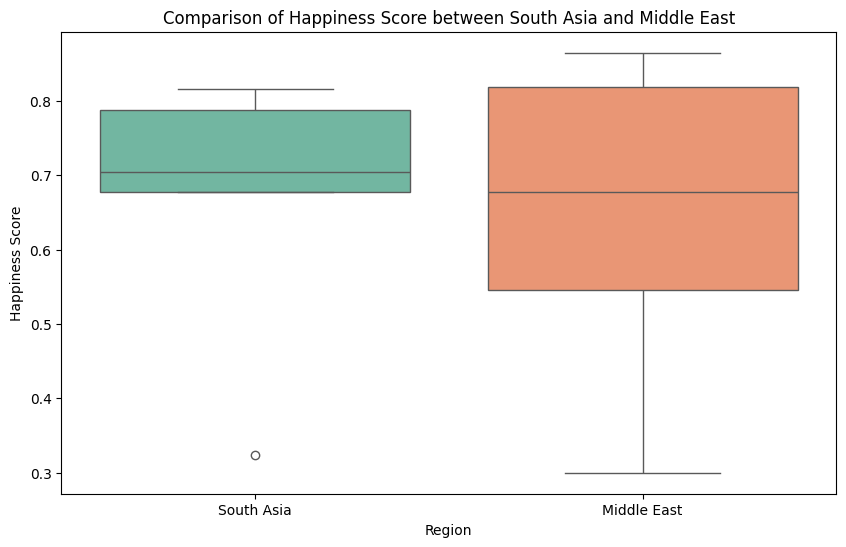

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for South Asia
south_asia_data = {
    'Country name': ['Nepal', 'India', 'Pakistan', 'Bangladesh', 'Afghanistan'],
    'score': [0.8159, 0.7874, 0.7039, 0.6774, 0.3238],
    'Region': ['South Asia'] * 5
}

# Data for Middle East
middle_east_data = {
    'Country name': ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen'],
    'score': [0.825, 0.634, 0.545, 0.750, 0.680, 0.865, 0.550, 0.825, 0.500, 0.830, 0.675, 0.460, 0.800, 0.300],
    'Region': ['Middle East'] * 14
}

# Create DataFrames for both regions
south_asia_df = pd.DataFrame(south_asia_data)
middle_east_df = pd.DataFrame(middle_east_data)

# Combine both datasets into a single DataFrame
combined_df = pd.concat([south_asia_df, middle_east_df])

# Create a boxplot to compare Score between South Asia and the Middle East
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df, palette="Set2")
plt.title('Comparison of Happiness Score between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()
